C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:42: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  main_categories_df = pd.DataFrame(main_categories_raw, dtype="int")[["CATEGORY_ID","TOPIC_TITLE_" + self.lang]]
C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:180: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data, dtype="float")


Correlation between TL_Credit and Import: 0.53
                            OLS Regression Results                            
Dep. Variable:         TP_BO_SBIL02-3   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     70.24
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.58e-14
Time:                        00:45:32   Log-Likelihood:                -690.59
No. Observations:                 179   AIC:                             1385.
Df Residuals:                     177   BIC:                             1392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

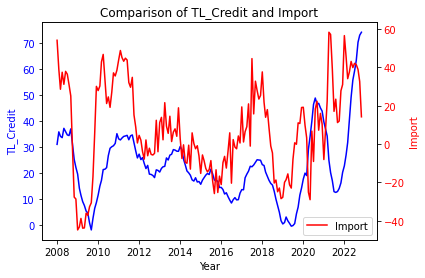

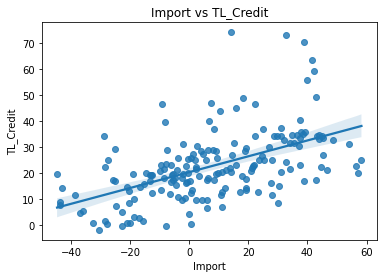

In [3]:
from evds import evdsAPI
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


evds = evdsAPI('YourAPIKEY')

def RegressionAnalysis(var1, var1_name, var1_1, var2, var2_name, var2_2, sd, ed):
    
    # Load data and format the date column
    df = evds.get_data([var1,var2], startdate = sd, enddate = ed, formulas="3")
    df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)
    df = df.set_index('Tarih')
    
    # Drop NA and ND values
    df = df[df[var2_2] != 'ND']
    df.dropna(subset=[var1_1, var2_2], inplace=True)
    df[var2_2] = df[var2_2].astype(float)
    
    #Save as an excel file
    df.to_excel("ithalatkredi.xlsx")
    
    # Calculate correlation
    corr = df[var1_1].corr(df[var2_2])
    print("Correlation between {} and {}: {:.2f}".format(var1_name, var2_name, corr))
    
    # Add a constant term to the independent variable
    X = sm.add_constant(df[var2_2])
    
    # Perform OLS regression
    results = sm.OLS(df[var1_1], X).fit()
    
    # Print the OLS regression summary
    print(results.summary())
    
    # Plot data with two y-axis
    fig, ax1 = plt.subplots()
    ax1.plot(df.index, df[var1_1], label=var1_name, color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(var1_name, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df.index, df[var2_2], label=var2_name, color='red')
    ax2.set_ylabel(var2_name, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title("Comparison of {} and {}".format(var1_name, var2_name))
    plt.legend()
    plt.show()
    
    # Plot scatter plot with regression line
    sns.regplot(x=var2_2, y=var1_1, data=df)
    plt.title("{} vs {}".format(var2_name, var1_name))
    plt.xlabel(var2_name)
    plt.ylabel(var1_name)
    plt.show()

    
# Parameters

var1="TP.BO.SBIL02" # Tl Credit YoY Change
var1_1 ="TP_BO_SBIL02-3" # Tl Credit YoY Change
var1_name="TL_Credit"

var2="TP.ODANA6.Q03" # Turkey Import Size YoY Change
var2_2="TP_ODANA6_Q03-3" # Turkey Import Size YoY Change
var2_name="Import"

sd = "01-01-2008"
ed = "31-01-2023"

RegressionAnalysis(var1, var1_name, var1_1, var2, var2_name, var2_2, sd, ed)
